In [57]:
import matplotlib.pyplot as plt

### Collaborative Filtering

* Online offerings are growing at such a rapid rate that it is very difficult to find relevant content or products

* Non personalized recommendations are a common way to filter through a large offerings
  * ex. Amazon bestseller in category X.
  * News you should know this week
  * Top 50 songs 
  * ....

* Based on slides from the [Mining Massive Datasets](mmds.org)
* Can we suggest items or users based on similarities?
  * Users A and B have similar tastes in movies. If user A likes Movie X, then user B might like it as well. Therefore, X is a good movie recommendation for user B.
  * Movies X and Y share similar elements (same characters, plots, etc.). Users A enjoys movie X, so suggesting movie Y may be relevant.




### Collaborative FIltering Example

<img src="https://www.dropbox.com/s/zl8vxnxmaji3bfb/cf_example.png?dl=1">


### Collaborative FIltering Example

* This problem is referred to as collaborative filtering:
  * Collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating) or items.
<img src="https://www.dropbox.com/s/zl8vxnxmaji3bfb/cf_example.png?dl=1" width=200>


* Premise: Users with "similar" feedback for a number of items have similar tastes.

### Feedback About Products

* The feedback about movies falls into one of two categories:

  1. Explicitly provided through a (typically numerical) rating scheme (e.g.: thumbs up or stars)
  
  2. Implicit
    * User finished or didn't finish a movie
    * Read a book in less time than his avg reading time
    * Played a song multiple imes
    * Multiple users in the same household watched the movie
    * Bought an item at time t and gifted another one.


### Utility Matrix

* There are two classes of entities
  * `users`: have preferences that they express either implicitely or explicitely. 
  * `items`: content or products that users express interest in.
  
* The `users` preferences for `items` is stored in a utility marix.

* We assume that the matrix is sparse
  * Most entries are “null” as users predominantly do not rate products

### Problems Relavant to Collaborative Filtering

1. Gathering “known” ratings for matrix
  * How to collect the data in the utility matrix? 
    * Explicit is easy and accurate but leads to more sparse data
    * Implict can be more helfpul but may be harder ro
    
2. Extrapolating unknown ratings from the known ones
  * Mainly interested in unknown ratings whose prediction we blieve is high
    * Collaborative filtering is not interested in knowing what you don’t like
    
3. Evaluating extrapolation methods: 
  * How can we measure the performance of recommendation methods?

### Extrapolating unknown ratings: Intuition

<img src="https://www.dropbox.com/s/8hx5swosjdb7vqs/correlation.png?dl=1" width=500>

### Extrapolating unknown ratings: Intuition - Cont'd

* Uncertainty in finding overlap with a single user can be mitigated by considering ratings from multiple users
  * Information is weighted by users similarity (proximity)
  
<img src="https://www.dropbox.com/s/gplfgbymxjb8vm0/distance.png?dl=1" >

* We'll start by finding the similarity between users as described above.


### Measure of Similarity: Jaccard Similarity

* Given a user `x`, find `N` other users whose ratings are “similar” to `x`’s ratings for some given products

* For simplicity, we can consider a simple "like" vs. "dislike" emoji
  * 👍 vs. 👎 scheme
    * 1 for like and 0 for dislike.
  * Numerical values can be converted to binary "vote" using a threshold

* Jaccard similarity (Jaccard Index) is a common way to access who similar sets are.
$$
J(X, Y) = \frac{|X \cap Y|}{|X \cup Y|},
$
where X is the set of ratings for user x and Y is the set of ratings for user y

In [33]:
import pandas as pd
movies = ["M1", "M2", "M3","M4","M5","M6","M7","M8","M9","M10","M11","M12","M13","M14","M15","M16","M17"]

viewers_ids =  pd.util.testing.rands_array(6, 20)
viewers_ids

array(['RHq02t', 'Cvcq8V', 'iQIshQ', 'b9mRaD', 'VSAkXZ', 'n2MtnJ',
       '6EHqgJ', '1OKXXg', 'akEOrn', 'Vc8PC1', 'edOUe4', 'UiZ2zl',
       '9zAW9L', 'OUOpqM', '967RBc', '7Ep8Qb', 'wli5IC', 'Ny4B6m',
       'qnLpZx', '61XGFa'], dtype=object)

In [45]:
import numpy as np
viewers_ratings = np.random.choice([-1, 0, 1], size=(len(symptoms)))            
viewers_ratings

array([ 1, -1,  0, -1,  0,  1, -1,  1,  1,  1,  0,  0,  1, -1, -1,  0,  1])

In [47]:
data = [np.random.choice([-1, 0, 1], size=(len(symptoms)))  for _ in range(len(viewers_ids))]
data

[array([ 1,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1,  1,  1,  0, -1, -1]),
 array([ 0,  1,  0,  0, -1,  1, -1, -1,  0,  1,  1,  1, -1,  0,  0,  1,  0]),
 array([-1,  1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  1,  1]),
 array([-1,  1, -1,  1,  0, -1, -1,  1, -1,  1,  0, -1, -1,  1, -1,  0,  1]),
 array([-1, -1,  0,  0, -1,  0,  1, -1,  1,  1,  1,  0,  1, -1,  0, -1, -1]),
 array([ 1,  1,  1, -1,  1,  1,  0,  1,  1,  0, -1, -1, -1,  1,  0,  1, -1]),
 array([ 1,  1,  0,  1,  1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1, -1]),
 array([ 1, -1,  0, -1,  1, -1, -1,  0,  0,  1,  0,  0, -1,  1,  0,  1, -1]),
 array([ 0,  0,  0, -1,  1, -1, -1,  0,  1, -1,  1,  0, -1, -1,  0,  1,  0]),
 array([ 0,  0,  0,  1,  0,  1,  1,  0,  0,  1,  1,  1, -1, -1, -1, -1, -1]),
 array([ 1,  1,  1,  0, -1,  1, -1,  0,  0,  0,  0,  0, -1,  0,  1,  1,  0]),
 array([-1,  0,  0,  0,  0,  1, -1, -1,  1,  0, -1,  0,  0,  0,  0,  1, -1]),
 array([ 0,  1, -1,  0,  1, -1, -1, -1,  1,  1,  1, -1,  0, -1, 

In [48]:
viewers_data = pd.DataFrame(columns=movies, data=data, index=viewers_ids)
viewers_data.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17
RHq02t,1,0,0,-1,-1,-1,0,0,0,0,0,-1,1,1,0,-1,-1
Cvcq8V,0,1,0,0,-1,1,-1,-1,0,1,1,1,-1,0,0,1,0
iQIshQ,-1,1,0,0,0,0,0,0,0,-1,-1,-1,0,0,-1,1,1
b9mRaD,-1,1,-1,1,0,-1,-1,1,-1,1,0,-1,-1,1,-1,0,1
VSAkXZ,-1,-1,0,0,-1,0,1,-1,1,1,1,0,1,-1,0,-1,-1


In [49]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])


(vec_1 == vec_2) 

array([ True,  True, False,  True,  True])

In [50]:
x = np.array([ True,  True,  False])
y = np.array([ True,  False, True])

x & y

array([ True, False, False])

In [51]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])


sum((vec_1 == vec_2) & (vec_1 == 1))

3

In [52]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])


sum((vec_1 == 1) | (vec_2 == 1))

4

In [82]:
def compute_Jaccard_sim(vec_1, vec_2):
    
    # All the symptoms shared by both
    intersection = sum((vec_1 == vec_2) & (vec_1 == 1))
    # All the symptoms that either one has
    union = sum((vec_1 == 1) | (vec_2 == 1))
    return 1 -  intersection / union

In [83]:
vec_1 = np.array([1, 0, 1, 1, 1])
vec_2 = np.array([1, 0, 0, 1, 1])


print(compute_Jaccard_sim(vec_1, vec_2 ))

0.25


In [44]:
viewers_data

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17
RHq02t,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0
Cvcq8V,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0
iQIshQ,1,0,0,1,1,1,0,1,1,1,1,0,0,1,0,0,1
b9mRaD,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
VSAkXZ,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1
n2MtnJ,1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0
6EHqgJ,1,1,1,0,1,0,0,0,0,1,1,1,1,0,1,0,0
1OKXXg,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1
akEOrn,1,0,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
Vc8PC1,1,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1


### Shortcomings of the Jaccard Distance

* The distance would work if it weren't for the missing values
 * Missing values (-1) are movies that a viewer hasn't watched yet.
  * Treating missing values as 0 means that the user didn't like them.

* The binary rating is not as efficient as a numerical score which provides more distinctions.


### Measure of Similarity: Pearson Correlation

* Two variables are correlated if knowledge of one helps better predict the other

  * In statistics, the strength of the relationship between the relative movements of two variables is often conveyed using the correlation coefficient.

  * The values range between -1.0 (negatively correlated) and 1.0 (positively correlated) 


### Pearson Correlation

![](https://www.dropbox.com/s/myshvo6b8qhcm6n/correlation_examples.png?dl=1)

### Linear Correlations

* Linear correlation ranges from -1 (_anti-correlated_) to 1  (_fully_ _correlated_) through 0 (_uncorrelated_)
* The most popular methods for computing linear correlation are:
  * Pearson Correlation coefficient ($R$)
  * Spearman Rank Correlation $(\rho)$

* Other methods can capture non-linear relationships and are more appropriate for a data science class.

### Positive Correlation 

```
X = [1,2,3,4,5,6,7,8,9,10]
Y = [11,12,13,14,15,16,17,18,19,20]
```

* As $X$ increases, $Y$ increases 

<img src="https://www.dropbox.com/s/k37c1q5r6lweo46/correlation_distance_mean.png?dl=1" alt="drawing" style="width:500px;"/>





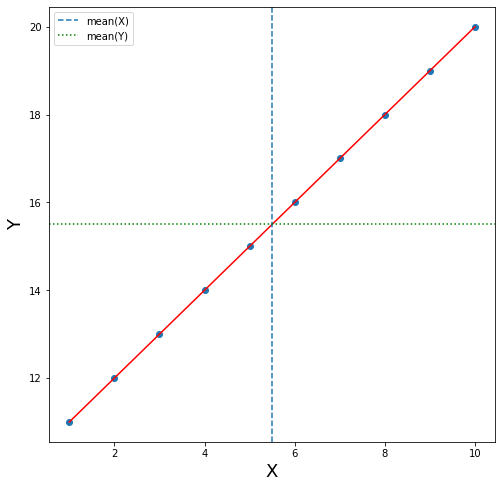

In [58]:
plt.figure(figsize=(8,8))
data = pd.DataFrame({"X":X, "Y":Y})
plt.scatter(X, Y)
plt.plot(X,Y, color ='r')
plt.xlabel("X", fontsize=18)
plt.ylabel("Y", fontsize=18)
plt.axvline(data["X"].mean(), linestyle='--', label="mean(X)")
plt.axhline(data["Y"].mean(), linestyle=':', label="mean(Y)", color='green')

plt.legend()

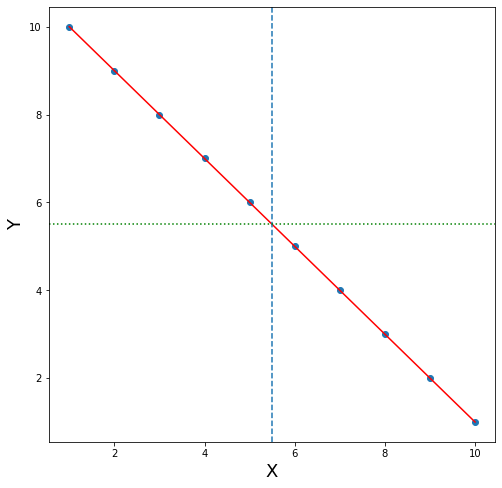

In [61]:
X = [1,2,3,4,5,6,7,8,9,10]
Y = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
data = pd.DataFrame({"X": X, "Y": Y})
data

plt.figure(figsize=(8,8))

plt.scatter(X, Y)
plt.plot(X,Y, color ='r')

plt.xlabel("X", fontsize=18)
plt.ylabel("Y", fontsize=18)

plt.axvline(data["X"].mean(), linestyle='--', label="mean(X)")
plt.axhline(data["Y"].mean(), linestyle=':', label="mean(Y)", color='green')



### Negative Correlation

* As $X$ descrases, $Y$ also descrases

<img src="https://www.dropbox.com/s/swz04h533lfl2fg/neg_correlation.png?dl=1" alt="drawing" style="width:500px;"/>

In [64]:
X = [1,2,3,4,5,6,7,8,9]
Y = [3,8,2,5,3,6,4,1,7]

data = pd.DataFrame({"X": X, "Y": Y})
data

,X,Y
0,1,3
1,2,8
2,3,2
3,4,5
4,5,3
5,6,6
6,7,4
7,8,1
8,9,7


### Lack of Correlation

* As $X$ increases, $Y$ sometimes increases and sometimes decreases

<img src="https://www.dropbox.com/s/t4xzs88xkvs2m8z/no_corr_distance.png?dl=1" alt="drawing" style="width:600px;"/>

### Computing The Correlation Coefficient

* Positive correlation: when X's distance from its mean increases, Y's distance from its mean increases.
  * The rates of increase are consistently similar
* Negative correlation: when X's distance from its mean increases, Y's distance from its mean decreases or vice-versa
  * The rates of decrease are consistently similar
* In the absence of correlation the contributions of $X_i$ and $Y_i$ cancel out. Therefore, the correlation tends toward 0
 

### Computing The Correlation Coefficient - Cont'd

* Pearson Correlation Coefficient

$$
r = \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})     }}{\sqrt{\sum_{i-1}^n{(X_i-\overline{X})}} \sqrt{\sum_{i-1}^n{(Y_i-\overline{Y})}} },
$$

  * where $i$ is a rating shared between `X` and `Y`.

* Pearson correlation measures how **in sync** two variables $X$ and $Y$ are

* It turns out that we can recompute correlation in a way that is computationally efficient



### Computing the Cosine Similarity

* In real-life situations, the average rating for any movie will be ~0.
  * Can you guess why? Hint, the matrix is sparse.

$$
r = \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})     }}{\sqrt{\sum_{i-1}^n{(X_i-\overline{X})^2}} \sqrt{\sum_{i-1}^n{(Y_i-\overline{Y})^2}} } \approx \frac{\sum_{i=1}^{n}{(X_i)(Y_i)     }}{\sqrt{\sum_{i-1}^n{X_i^2}} \sqrt{\sum_{i-1}^n{Y_i^2}} } = \mbox{cos}(\overrightarrow{X}, \overrightarrow{Y})
$$



### Computing the Cosine Similarity - Cont'd

![](https://www.dropbox.com/s/e854l6o83hvtmpv/user_rating_example.png?dl=1)

### Computing the Cosine Similarity - Cont'd
![](https://www.dropbox.com/s/xln9uagok4e56z6/cosine_example.png?dl=1)

### From Similarity Score to Recommendations

* Given a set of `N` users that are similar to user `x`, we could predict the rating for item `s` for user `x` as the scaled average of the ratings of the users of $N$ 


* Values a scaled by the similarity to `x`.

<img src="https://www.dropbox.com/s/gplfgbymxjb8vm0/distance.png?dl=1" >


* There are many other options to do this but the concept remains the same.


### From Similarity Score to Recommendations: Example


$$
\mbox{ratings}_{xi}=\frac{\sum_{y \in N} \mbox{sim}(x,y)\cdot \mbox{ratings}_{yi}}{\sum_{y\in N}\mbox{sim}(x,y)},
$$


### Collaboration filtering based on Items

* The same approach can also be applied to items
  * Inferring items that are similar can be used to generate ratings

* Here, we consider the users as dimensions and the movies as the instances (points) in our high dimensional space.
    
    
![](https://www.dropbox.com/s/nb9548nd6qdhlwr/movie_rating.png?dl=1)


### Example  

What is the most likely rating for movie 1 for user 5?

<img src="https://www.dropbox.com/s/9b4616lupkrxrya/movie_rating_1.png?dl=1">
1. Neighbors selection. Which movies rated by user 5 are most similar to movie 1?
2. Compute the rating scaled by the distance.


### Example: normalizing input

* Given that ratings are typically subjective, it's common to normalize their values to assure some sort of comparability

  * E.g., given two users, the first who gives a max rating of 8 and the second who gives a maximum rating of 5.
    * The dissimilarity between the two vectors is due to subjectivity in rating
    
<img src="https://www.dropbox.com/s/voehxfm9a2osxj4/Difference_in_simiar_rating.png?dl=1" width=450>


### Example: Normalizing The Ratings

* A simple way to normalize data is to subtract the mean rating.
* Resulting ratings are then centered around 0.

<img src="https://www.dropbox.com/s/sofzoh44geyqe2b/normalized_vectors.png?dl=1">


In [74]:
!pip install scipy 

In [78]:
### Example: finding neighbors

from scipy import spatial
user_1_complete = [1, 3, 5, 5, 4]
user_3_complete = [2, 4, 1, 2, 3, 4, 3, 5]
user_1 = [1, 5, 4]
user_3 = [2, 4, 5]

user_1 = user_1 - np.mean(user_1_complete)
user_3 = user_3 - np.mean(user_3_complete)

1 - spatial.distance.cosine(user_1, user_3)

ModuleNotFoundError: No module named 'scipy'

In [79]:
user_6_complete = [1, 3, 3, 2, 4]
user_1 = [1, 3, 4]
user_6 = [1, 3, 4]

user_1 = user_1 - np.mean(user_1_complete)
user_6 = user_6 - np.mean(user_6_complete)

1 - spatial.distance.cosine(user_1, user_6)

NameError: name 'a_complete' is not defined

### Example: Computing the Rating

* We compute the rating for movie 5 for user `1` as the distance-scaled ratings of users `3` and `6` 

$$
rating_{1,5} = ((0.65 * 2) + ( 0.76 * 3)) / (0.65 + 0.76) = 2.53
$$


### Evaluating Inference

- Given a partially filled matrix how can we evaluate the quality of our inference?

<img src="https://www.dropbox.com/s/qa8vdt22k0sjuq8/missing.png?dl=0">


### Evaluating Inference: Approach

* Randomly pick X% (typically 20%) of the data and turn it into missing values
  * Some users may not contribute if they don't have many ratings.
<img src="https://www.dropbox.com/s/qa8vdt22k0sjuq8/missing.png?dl=1" width=500>
* Predict ratings and use the ones masked to estimate how close the predictions were 
  * Use metrics such as the following to estimate how far off the predictions are:
    * MAE (mean absolute error): $\frac{1}{n}\sum |p_i - r_i|$ 
    * RMSE (root mean squared error): $\sqrt{\frac{1}{n} \sum(p_i - r_i)^2}$ 
    

### Evaluating Inference: Top-N Recommendations and Ranked Metrics

* Typically, predicting an actual recommendation value is not required.
  * We predicted ratings of 5 and 4.5 for two movies but the user rated them as 4.5 and 4. Our prediction is considered accurate since the order of preference is the same.
    * We predicted that the user would like the first movie more than the second, which was correct
  
  * We predicted ratings of 5 and 4.5 for two movies but the user rated them as 4.5 and 5. This is problematic since the order of preference is different
      * We predicted that the user would like the second movie more than the first, which was erroneous.
      
* In this regard, it is important to evaluate whether the ranking we have derived makes sense.       


### Evaluating Inference: Top-N Recommendations and Ranked Metrics

* This is typically solved nu computing rank-based metrics
  * How similar to the ground truth is the predicted ranking over the top N recommendations 
    * We focus on top-n since the low-ranked value may be overlooked by the user.

<img src="https://www.dropbox.com/s/0bnz6z6z6cb7vvr/ranked_results.png?dl=1">

* See definitions of rank-based metrics such as Normlized Discounted Cumulative Gain (NDCG) in the MMDS book

### Evaluating Inference 


* Other issues that need to be accounted for are:
  * Recommendation diversity:
    * Recommending only harry potter movies to some who like Harry Potter 1 (the Sorcerer's Stone) shows lack of diversity.
  * Recommendation Context
    * users selecting a documentary about the queen of England immedately after her death does not mean he is interested in all documentaries about the queen much later.



### Concluding Remarks
* There are many other approaches to collaborative filters.
  * Some methods use linear algebra, while other users use dimensionality reduction of deep learning
* From MMDS (based on students' experiences): Don’t try to reduce data size in an effort to make fancy algorithms work.
    * Simple methods on large data do best
    * Add more ancillary data
      * e.g., add IMDB data on genres

   * [More data beats better algorithms](http://anand.typepad.com/datawocky/2008/03/more-data-usual.html)